In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,
2023-11-01 00:00:30-05:00,9.0,8.0,16.0,16.0,17.0,10.0,11.0,6.0,13.0,5.0,20.0
2023-11-01 00:01:00-05:00,7.0,9.0,16.0,15.0,18.0,13.0,11.0,11.0,17.0,7.0,20.0
2023-11-01 00:01:30-05:00,7.0,9.0,17.0,14.0,18.0,13.0,11.0,12.0,19.0,6.0,20.0
2023-11-01 00:02:00-05:00,6.0,9.0,18.0,12.0,NaN,12.0,10.0,12.0,19.0,6.0,21.0
2023-11-01 00:02:30-05:00,7.0,9.0,18.0,14.0,17.0,11.0,10.0,10.0,16.0,7.0,21.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2585.000000,2671.000000,2763.000000,2714.000000,2803.000000,2684.000000,2776.000000,2658.000000,2787.000000,2756.000000,2588.000000
mean,8.108704,9.074130,10.016649,8.968681,9.028184,8.625559,7.393012,6.486080,8.681378,7.319303,11.771252
std,4.325318,5.457062,4.194633,3.957028,3.018665,3.131762,2.898041,3.383859,4.726210,4.355901,3.607994
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,5.000000,5.000000,6.000000,5.250000,6.000000,6.000000,5.000000,4.000000,5.000000,4.000000,9.000000
50%,7.000000,8.000000,10.000000,9.000000,9.000000,9.000000,8.000000,6.000000,9.000000,6.000000,11.000000
75%,11.000000,11.000000,14.000000,12.000000,11.000000,11.000000,10.000000,9.000000,12.000000,10.000000,15.000000
max,22.000000,25.000000,25.000000,21.000000,18.000000,18.000000,17.000000,16.000000,22.000000,19.000000,24.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,
2023-11-01 00:00:30-05:00,38.0,34.0,60.0,60.0,62.0,42.0,46.0,25.0,53.0,21.0,68.0
2023-11-01 00:01:00-05:00,30.0,38.0,60.0,58.0,64.0,53.0,46.0,46.0,62.0,30.0,68.0
2023-11-01 00:01:30-05:00,30.0,38.0,62.0,55.0,64.0,53.0,46.0,50.0,66.0,25.0,68.0
2023-11-01 00:02:00-05:00,25.0,38.0,64.0,50.0,NaN,50.0,42.0,50.0,66.0,25.0,70.0
2023-11-01 00:02:30-05:00,30.0,38.0,64.0,55.0,62.0,46.0,42.0,42.0,60.0,30.0,70.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2585.000000,2671.000000,2763.000000,2714.000000,2803.000000,2684.000000,2776.000000,2658.000000,2787.000000,2756.000000,2588.000000
mean,33.024758,35.820292,40.306551,36.867354,37.476275,35.997765,31.147695,27.296087,35.371008,29.923440,46.932380
std,15.596826,18.390843,14.917579,14.993551,11.722633,12.510927,11.914341,13.763090,17.776938,16.215661,11.722918
min,5.000000,5.000000,9.000000,5.000000,13.000000,9.000000,5.000000,0.000000,0.000000,5.000000,17.000000
25%,21.000000,21.000000,25.000000,22.000000,25.000000,25.000000,21.000000,17.000000,21.000000,17.000000,38.000000
50%,30.000000,34.000000,42.000000,38.000000,38.000000,38.000000,34.000000,25.000000,38.000000,25.000000,46.000000
75%,46.000000,46.000000,55.000000,50.000000,46.000000,46.000000,42.000000,38.000000,50.000000,42.000000,58.000000
max,72.000000,79.000000,79.000000,70.000000,64.000000,64.000000,62.000000,60.000000,72.000000,66.000000,77.000000


## Histograms

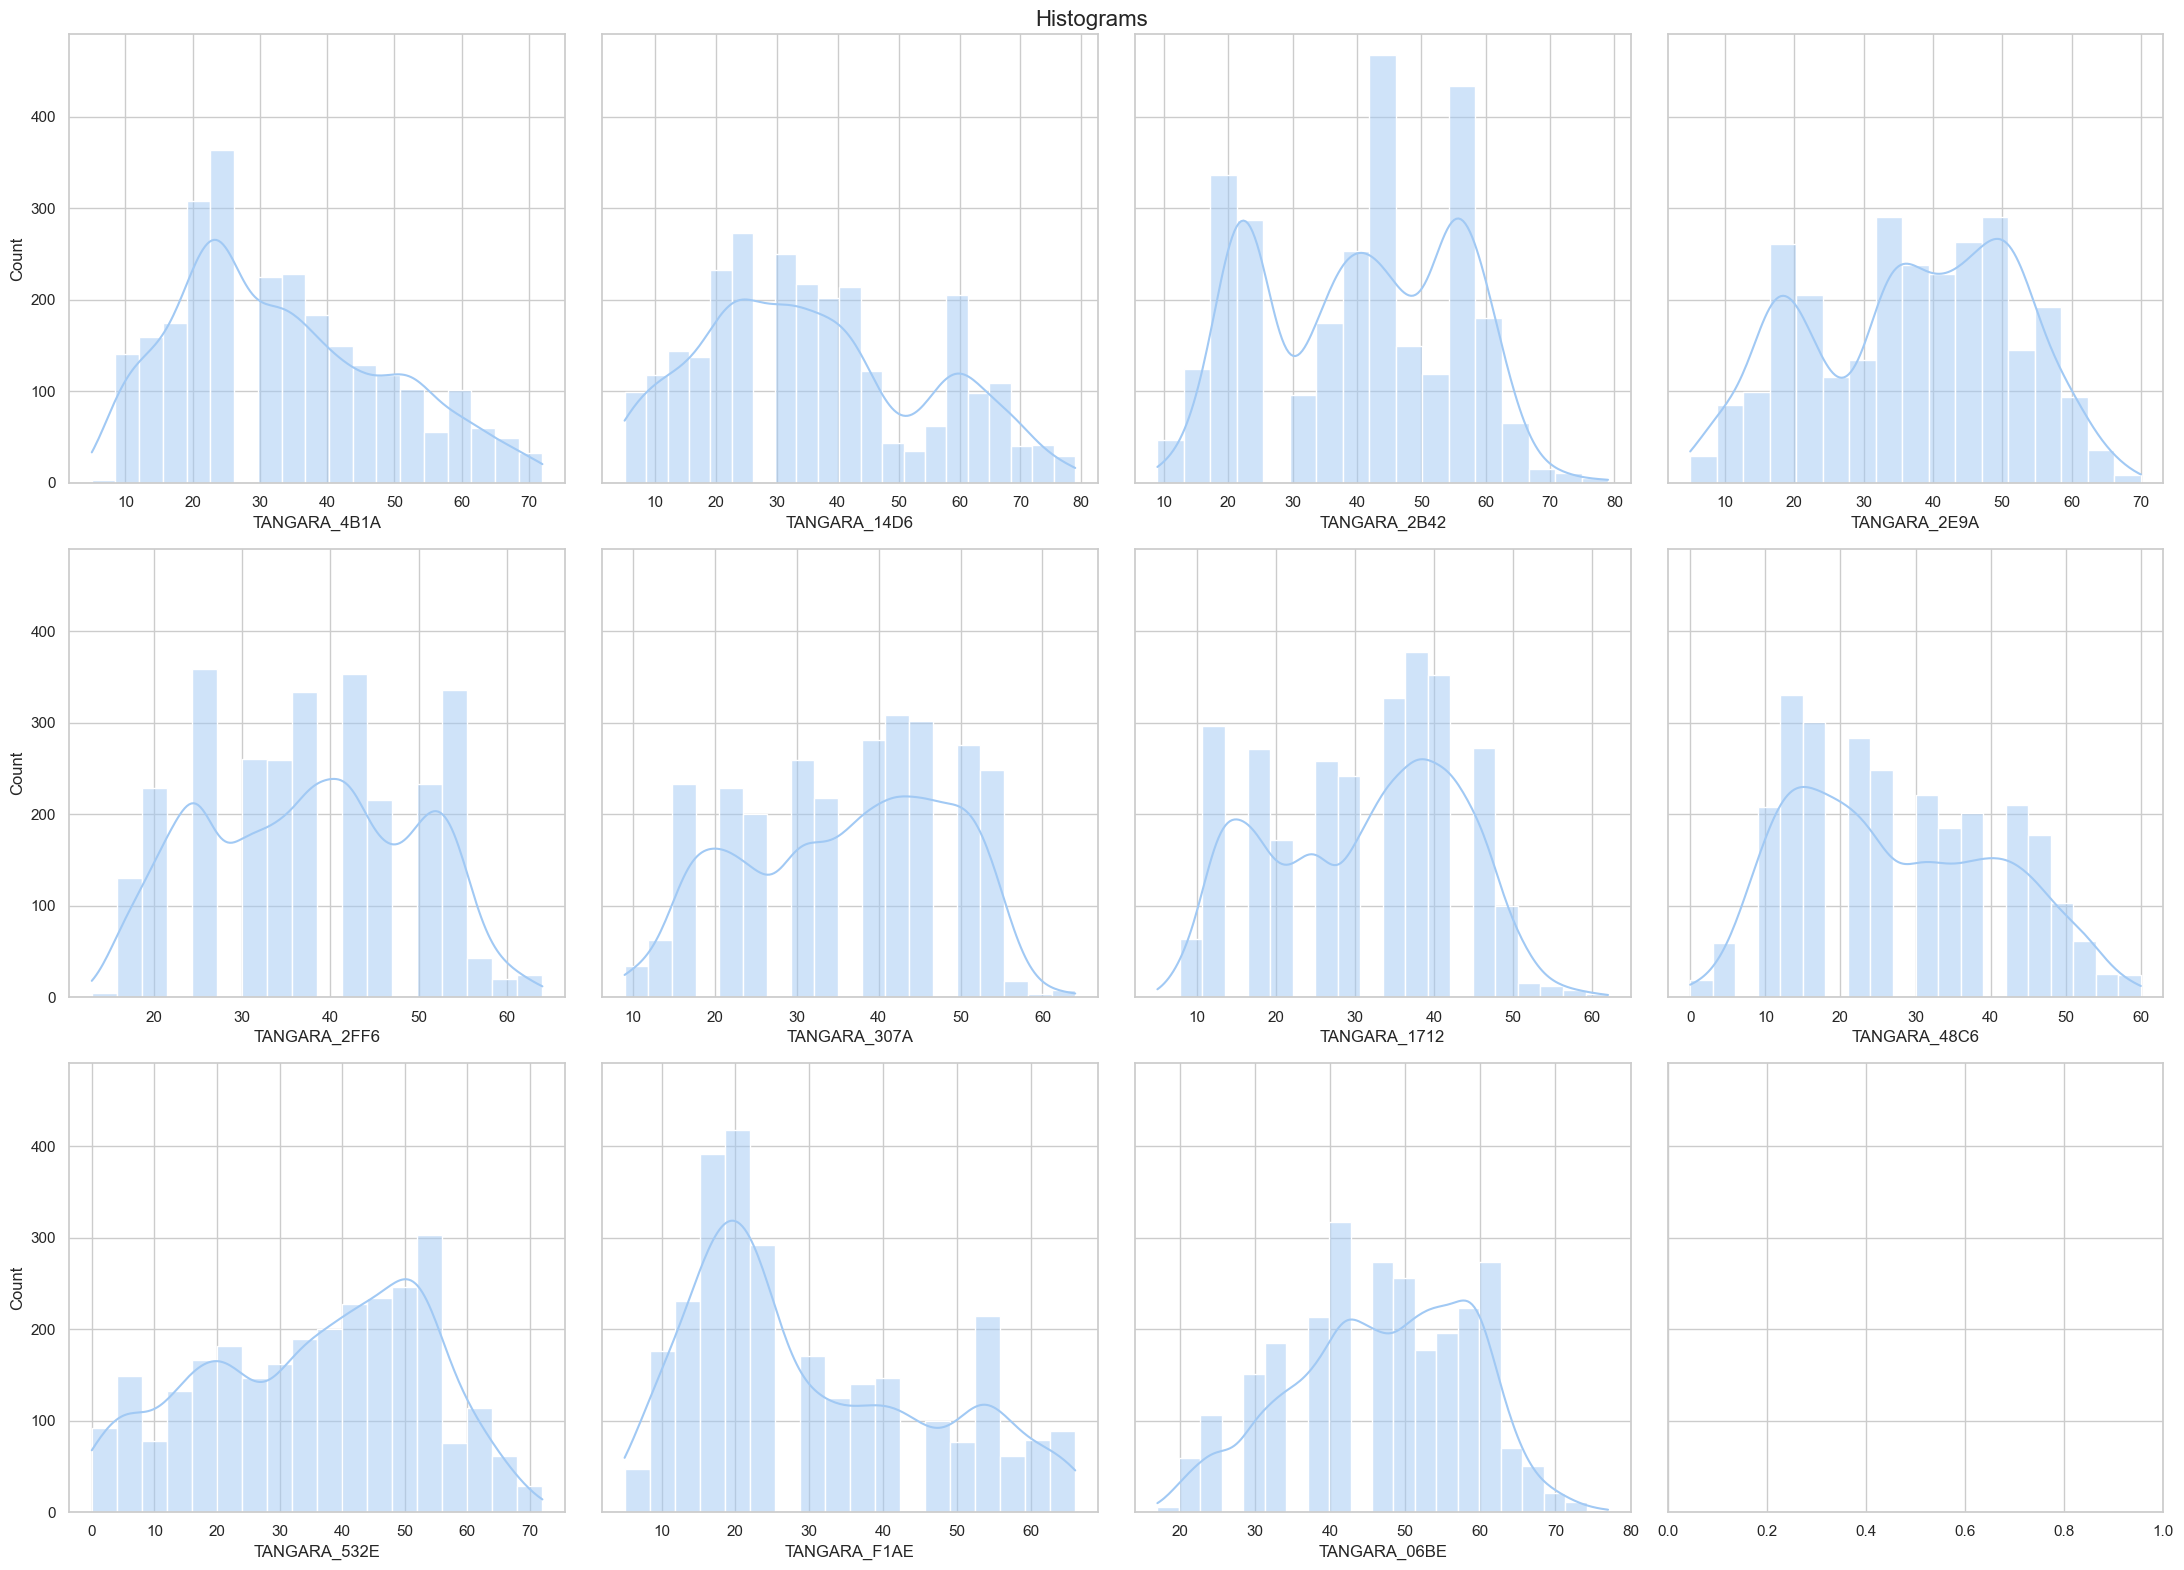

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

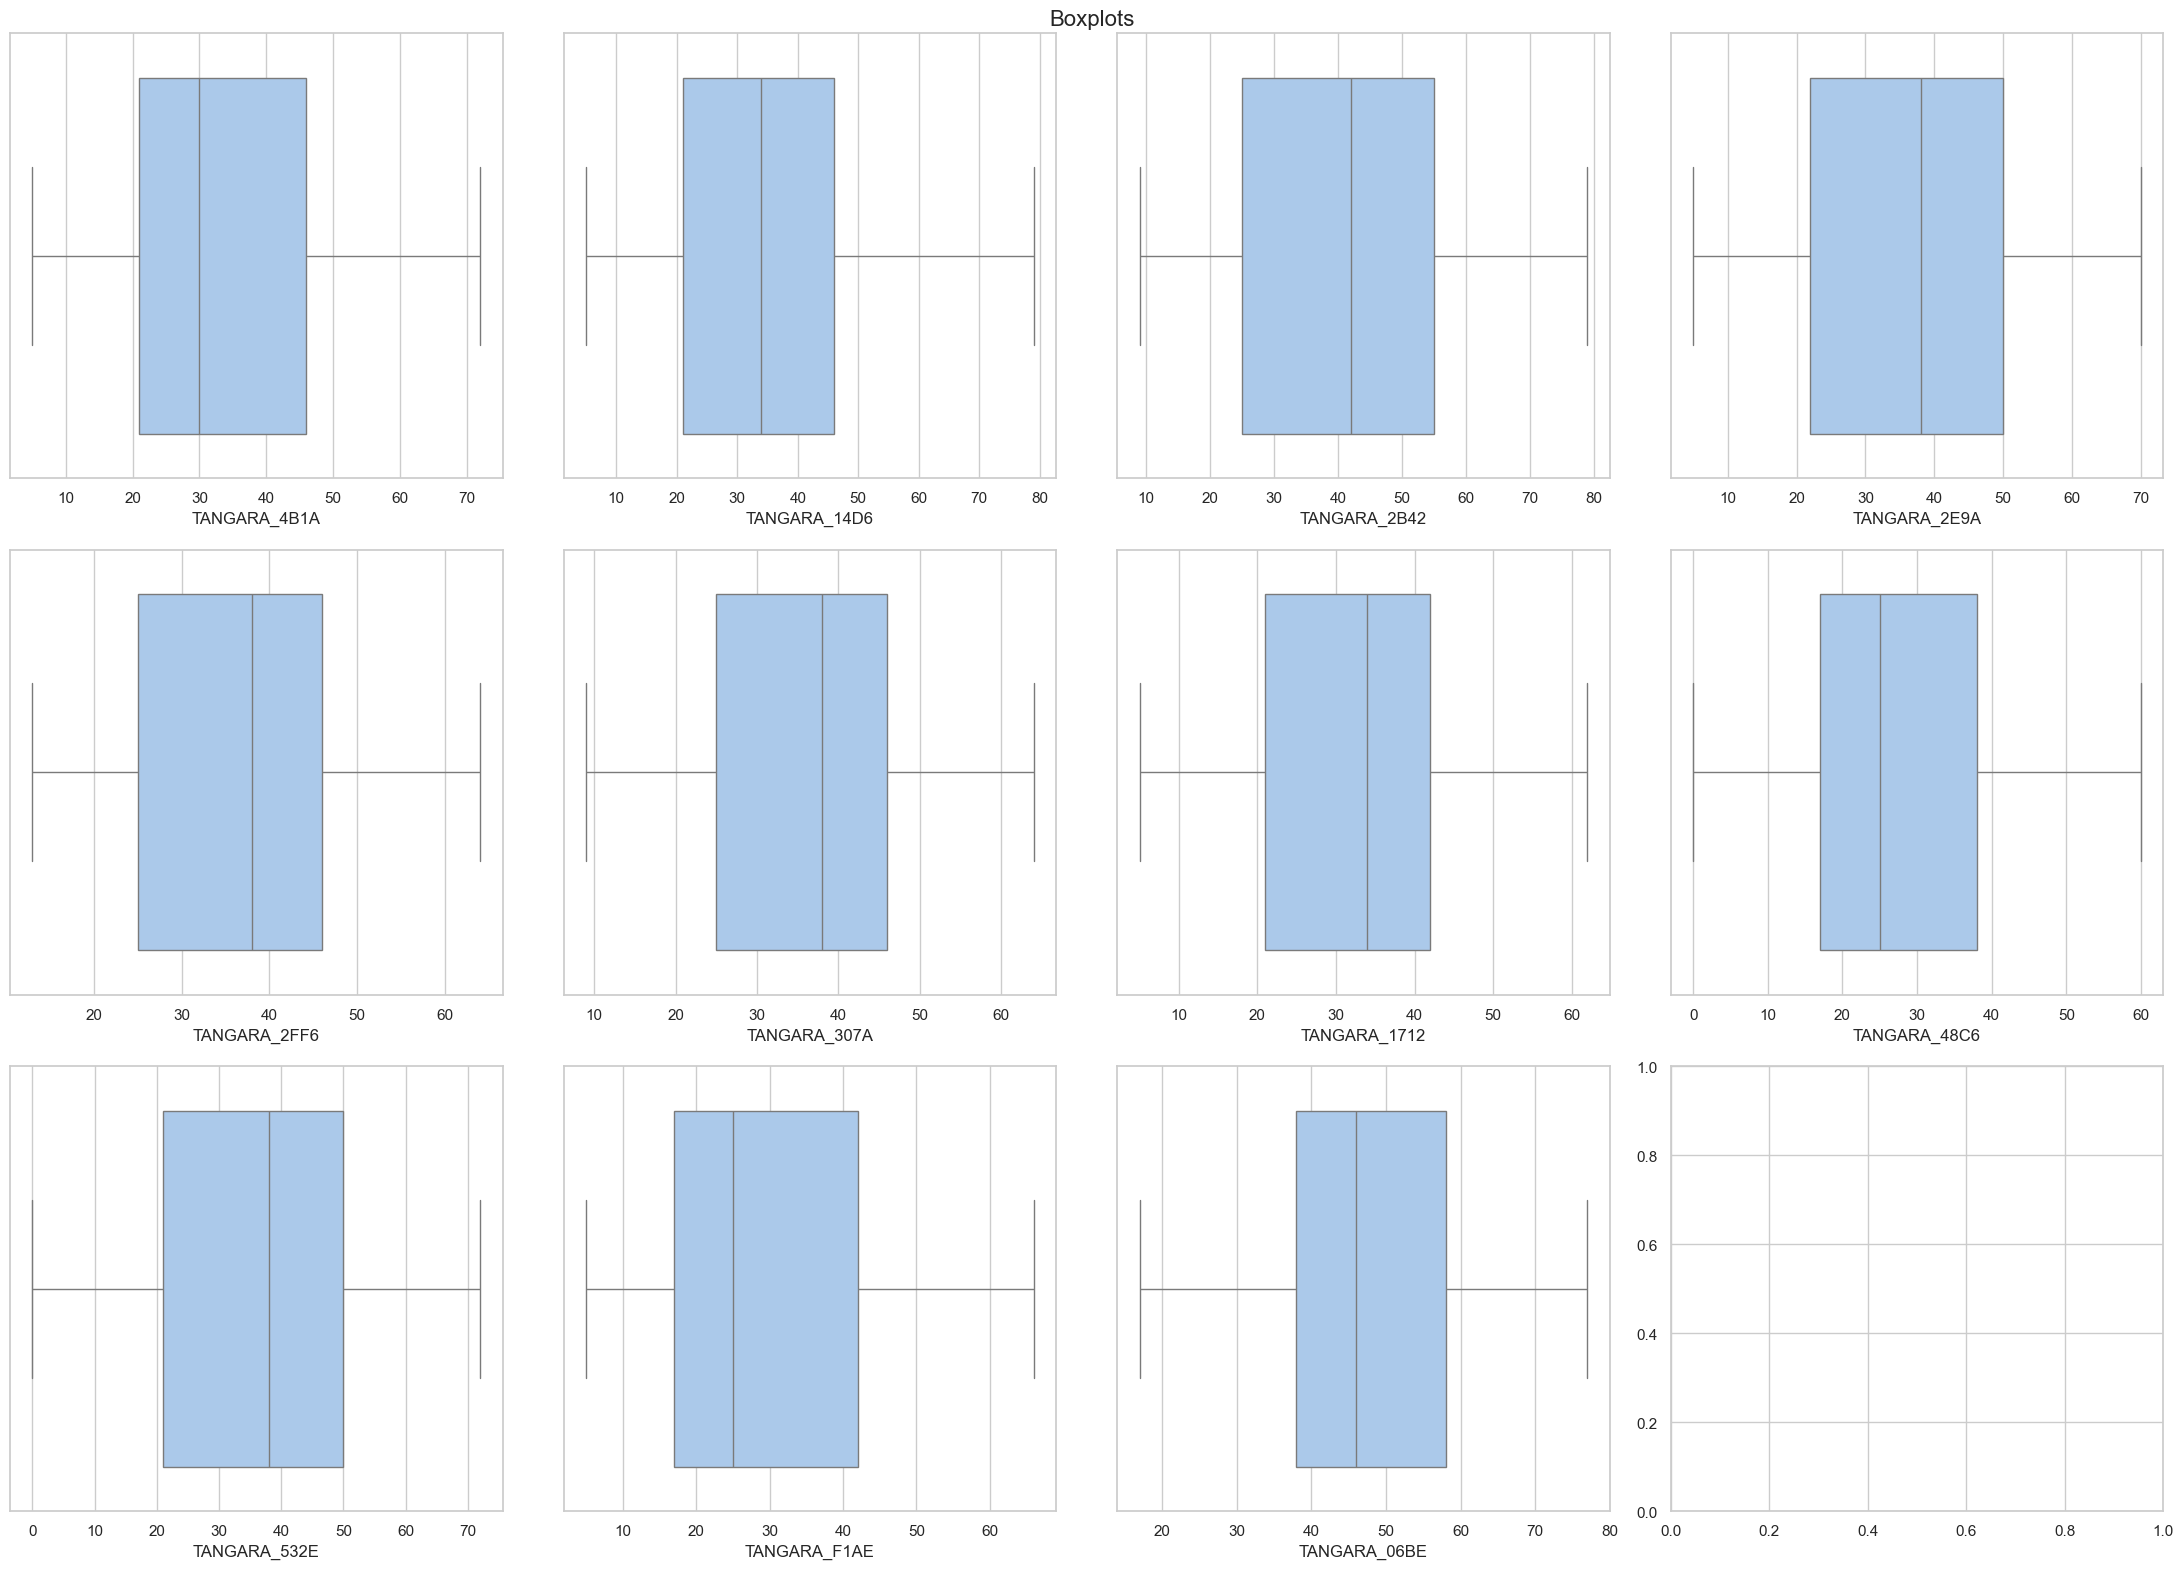

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

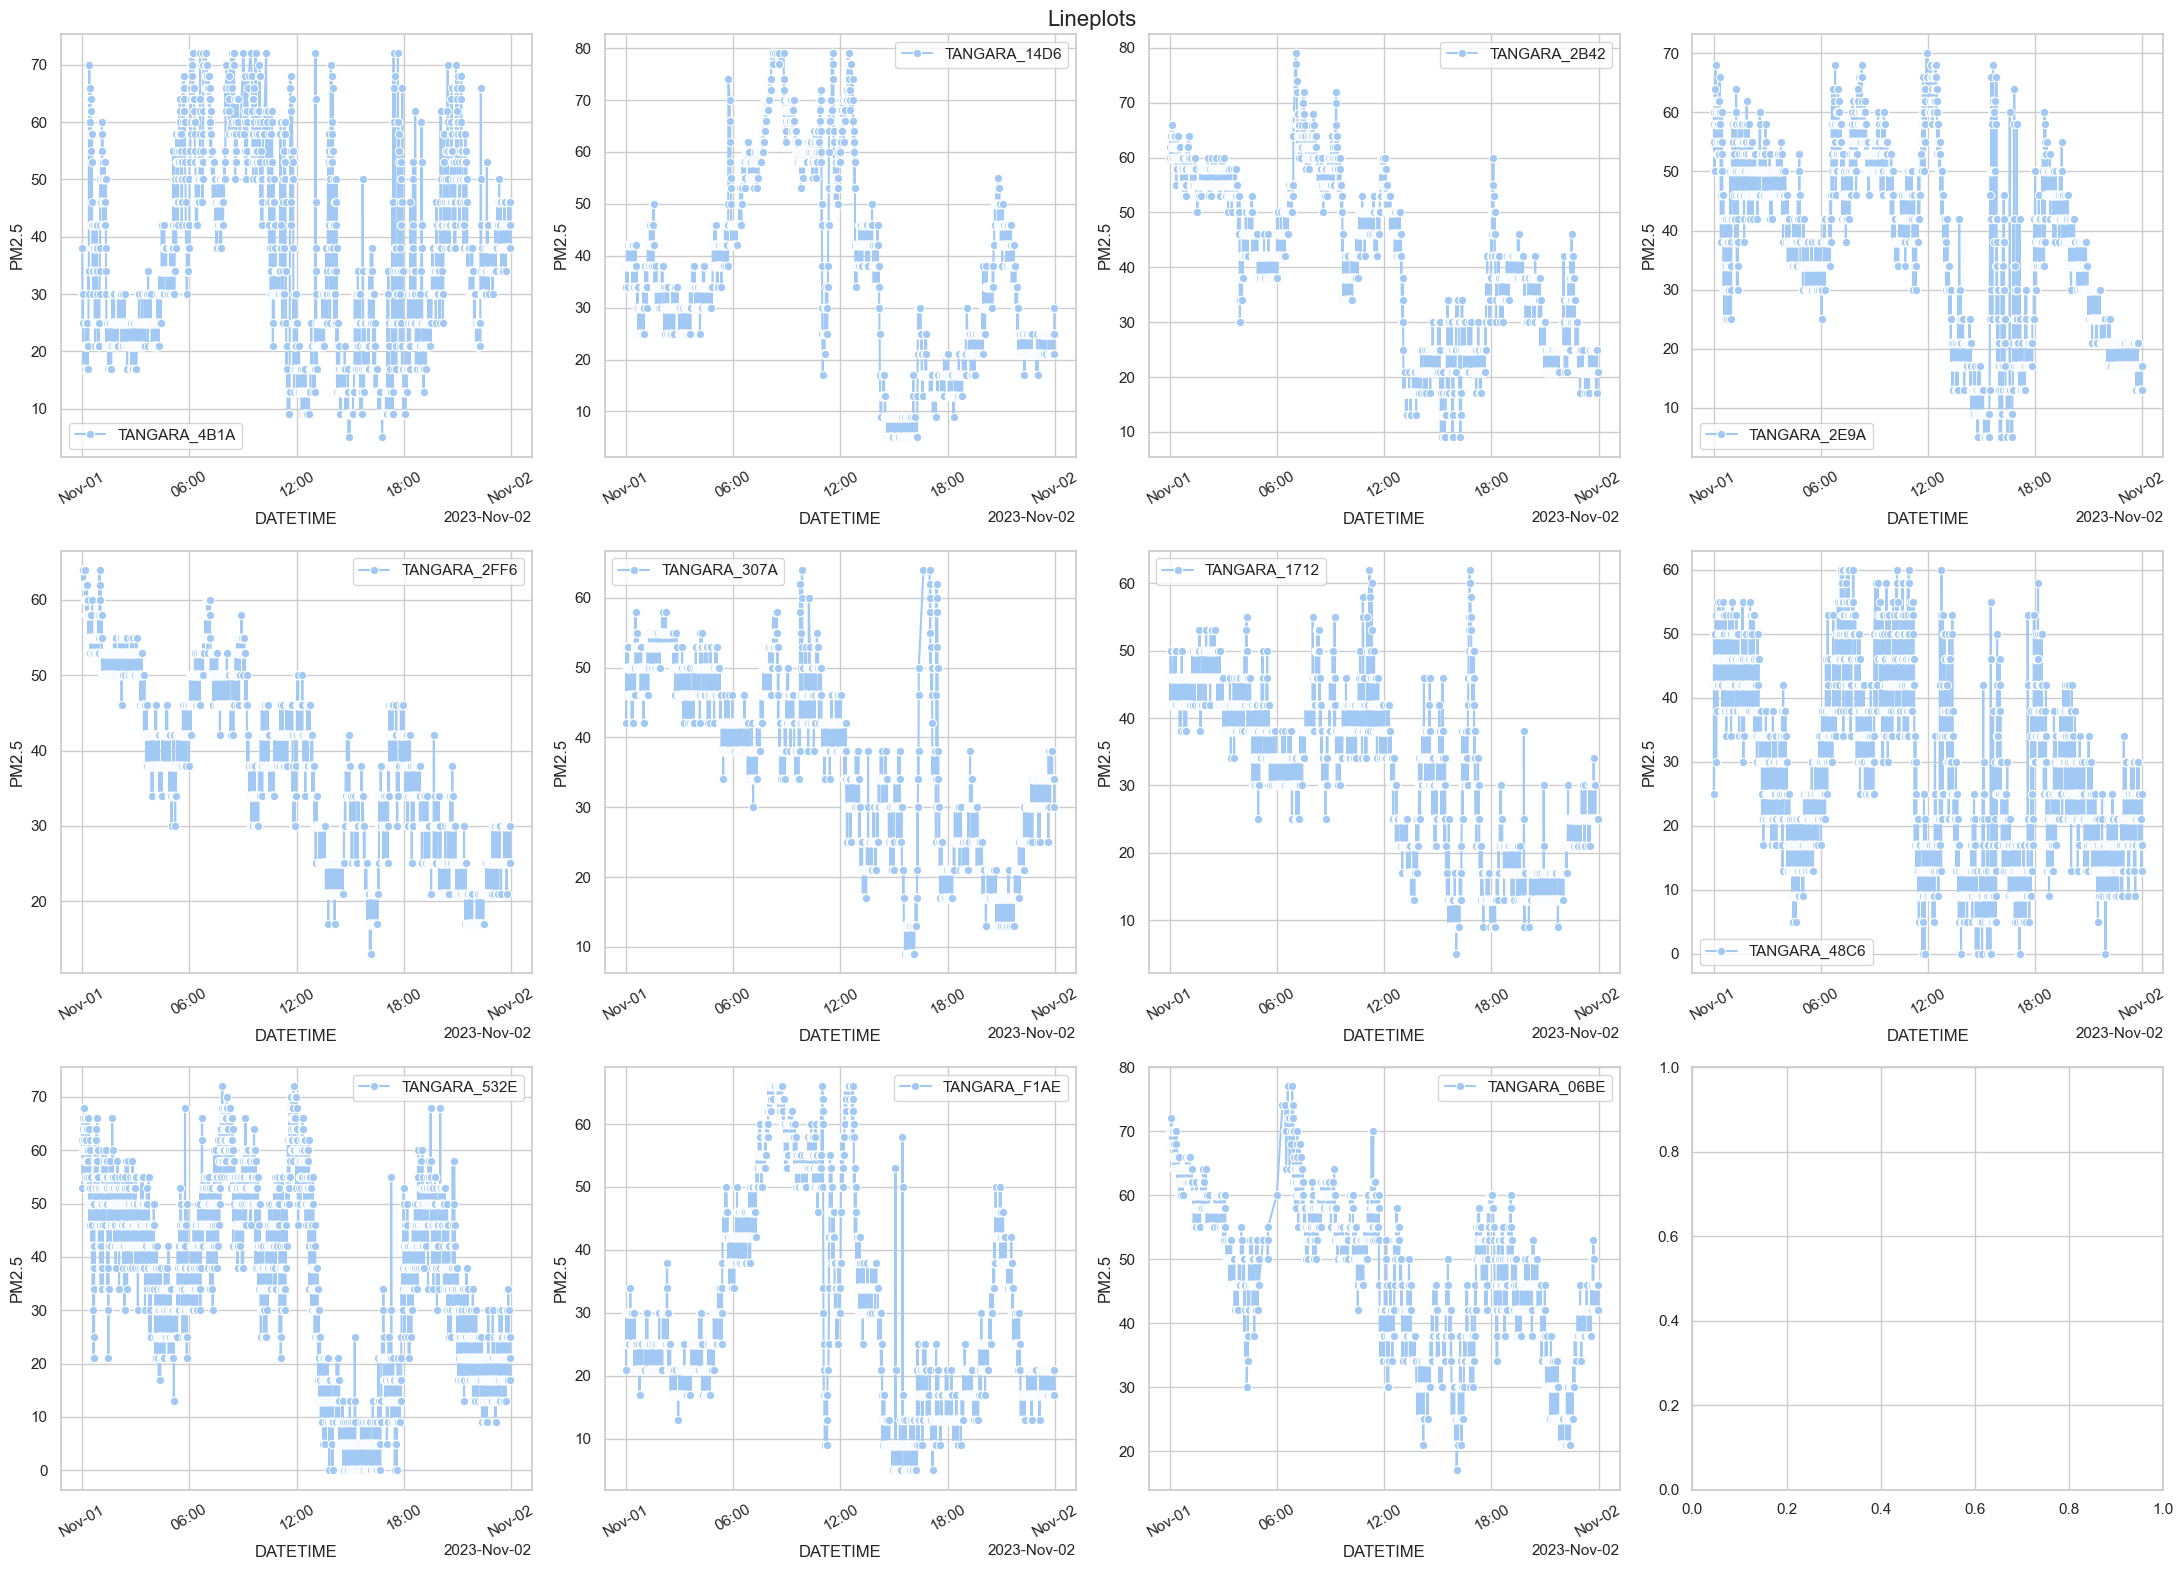

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')